In [ ]:
import pandas as pd
import numpy as np


In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
nifty_symbol = "^NSEI"
# Define the date range for which you want to fetch the data
start_date = "2021-07-23"
end_date = "2023-07-24"

# Define the desired timeframe (interval)
timeframe = "1d"

# Fetch the data using yfinance
nifty_data = yf.download(nifty_symbol, start=start_date, end=end_date, interval=timeframe)
#nifty_data.index = pd.to_datetime(nifty_data.index)
nifty_data


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-23,15856.799805,15899.799805,15768.400391,15856.049805,15856.049805,294100
2021-07-26,15849.299805,15893.349609,15797.000000,15824.450195,15824.450195,267100
2021-07-27,15860.500000,15881.549805,15701.000000,15746.450195,15746.450195,311000
2021-07-28,15761.549805,15767.500000,15513.450195,15709.400391,15709.400391,318600
2021-07-29,15762.700195,15817.349609,15737.799805,15778.450195,15778.450195,401600
...,...,...,...,...,...,...
2023-07-17,19612.150391,19731.849609,19562.949219,19711.449219,19711.449219,268700
2023-07-18,19787.500000,19819.449219,19690.199219,19749.250000,19749.250000,286400
2023-07-19,19802.949219,19851.699219,19727.449219,19833.150391,19833.150391,259700


In [ ]:
nifty_data.values
nifty_data.shape

(496, 6)

In [ ]:
nifty_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,17506.515530,17588.174566,17398.713385,17497.935795,17497.935795,281547.983871
std,862.160782,848.160870,870.703006,860.043906,860.043906,80439.472922
min,15272.650391,15382.500000,15183.400391,15293.500000,15293.500000,0.000000
25%,17061.600098,17147.863281,16916.899902,17015.812988,17015.812988,232325.000000
50%,17582.875000,17658.549805,17464.950195,17576.575195,17576.575195,263900.000000
75%,18084.449707,18130.062012,17967.711914,18058.062500,18058.062500,311525.000000
max,19831.699219,19991.849609,19758.400391,19979.150391,19979.150391,696500.000000


In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


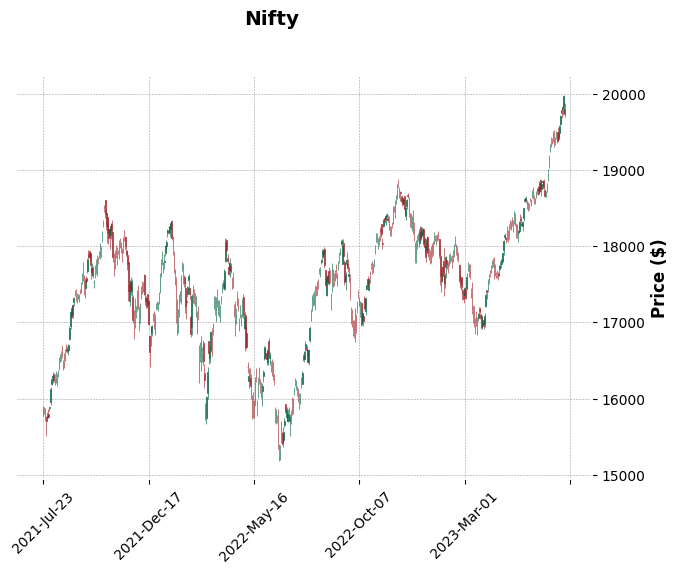

In [ ]:
import mplfinance as fplt

fplt.plot(
            nifty_data,
            type='candle',
            style='charles',
            title='Nifty',
            ylabel='Price ($)',
            )


In [ ]:


# Find support and resistance levels with dates
def find_support_resistance_with_dates(df, threshold=0.05):
    local_minima = nifty_data[(nifty_data['Low'].shift(1) > nifty_data['Low']) & (nifty_data['Low'].shift(-1) > nifty_data['Low'])]
    local_maxima = nifty_data[(nifty_data['High'].shift(1) < nifty_data['High']) & (nifty_data['High'].shift(-1) < nifty_data['High'])]

    support_levels = local_minima[local_minima['Low'] >= local_minima['Low'].quantile(threshold)]
    resistance_levels = local_maxima[local_maxima['High'] <= local_maxima['High'].quantile(1 - threshold)]

    return support_levels, resistance_levels

support_levels, resistance_levels = find_support_resistance_with_dates(nifty_data)
support_levels, resistance_levels

nifty_data.loc[support_levels.index, 'Level_Type'] = 1 # Support
nifty_data.loc[resistance_levels.index, 'Level_Type'] = -1 # Resistance

nifty_data


,Open,High,Low,Close,Adj Close,Volume,Level_Type
Date,,,,,,,
2021-07-23,15856.799805,15899.799805,15768.400391,15856.049805,15856.049805,294100,NaN
2021-07-26,15849.299805,15893.349609,15797.000000,15824.450195,15824.450195,267100,NaN
2021-07-27,15860.500000,15881.549805,15701.000000,15746.450195,15746.450195,311000,NaN
2021-07-28,15761.549805,15767.500000,15513.450195,15709.400391,15709.400391,318600,NaN
2021-07-29,15762.700195,15817.349609,15737.799805,15778.450195,15778.450195,401600,NaN
...,...,...,...,...,...,...,...
2023-07-17,19612.150391,19731.849609,19562.949219,19711.449219,19711.449219,268700,NaN
2023-07-18,19787.500000,19819.449219,19690.199219,19749.250000,19749.250000,286400,NaN
2023-07-19,19802.949219,19851.699219,19727.449219,19833.150391,19833.150391,259700,NaN


In [ ]:
# plt.figure(figsize=(10, 6))
# plt.plot(nifty_data['Close'], label='Price')
# plt.scatter(nifty_data.index, nifty_data['support'], color='green', marker='o', label='Support')
# plt.scatter(nifty_data.index, nifty_data['resistance'], color='red', marker='o', label='Resistance')
# plt.legend()
# plt.title('Price with Support and Resistance Levels')
# plt.xlabel('Date')
# plt.ylabel('Close')
# plt.show()

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib


--2023-08-23 07:24:35--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-08-23 07:24:36--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-08-23 07:24:36--  http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cytranet.dl.s

In [ ]:
#!pip install talib==0.4.23
import talib

print(talib.__version__)

0.4.28


In [ ]:
talib.get_function_groups().keys()

dict_keys(['Cycle Indicators', 'Math Operators', 'Math Transform', 'Momentum Indicators', 'Overlap Studies', 'Pattern Recognition', 'Price Transform', 'Statistic Functions', 'Volatility Indicators', 'Volume Indicators'])

In [ ]:
candlestick_patterns = [
    talib.CDLMORNINGSTAR,
    talib.CDLEVENINGSTAR,
    #talib.CDLBULLISHENGULFING,
    #talib.CDLBEARISHENGULFING,

    talib.CDLHAMMER,
    talib.CDLDOJI,
    talib.CDLHARAMI,


    talib.CDLPIERCING,
    talib.CDLDARKCLOUDCOVER,
    talib.CDLSHOOTINGSTAR,
    talib.CDLMARUBOZU,
    talib.CDLENGULFING,


]

# Detect candlestick patterns and add them as new columns to the DataFrame
for pattern_function in candlestick_patterns:
    pattern_name = pattern_function.__name__[3:]  # Extract the pattern name from the function name
    pattern_result = pattern_function(nifty_data['Open'], nifty_data['High'], nifty_data['Low'], nifty_data['Close'])
    nifty_data[pattern_name] = pattern_result

# Display the DataFrame with detected candlestick patterns
nifty_data


,Open,High,Low,Close,Adj Close,Volume,Level_Type,MORNINGSTAR,EVENINGSTAR,HAMMER,DOJI,HARAMI,PIERCING,DARKCLOUDCOVER,SHOOTINGSTAR,MARUBOZU,ENGULFING
Date,,,,,,,,,,,,,,,,,
2021-07-23,15856.799805,15899.799805,15768.400391,15856.049805,15856.049805,294100,NaN,0,0,0,0,0,0,0,0,0,0
2021-07-26,15849.299805,15893.349609,15797.000000,15824.450195,15824.450195,267100,NaN,0,0,0,0,0,0,0,0,0,0
2021-07-27,15860.500000,15881.549805,15701.000000,15746.450195,15746.450195,311000,NaN,0,0,0,0,0,0,0,0,0,0
2021-07-28,15761.549805,15767.500000,15513.450195,15709.400391,15709.400391,318600,NaN,0,0,0,0,0,0,0,0,0,0
2021-07-29,15762.700195,15817.349609,15737.799805,15778.450195,15778.450195,401600,NaN,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-17,19612.150391,19731.849609,19562.949219,19711.449219,19711.449219,268700,NaN,0,0,0,0,0,0,0,0,0,0
2023-07-18,19787.500000,19819.449219,19690.199219,19749.250000,19749.250000,286400,NaN,0,0,0,0,0,0,0,0,0,0
2023-07-19,19802.949219,19851.699219,19727.449219,19833.150391,19833.150391,259700,NaN,0,0,0,0,0,0,0,0,0,0


In [ ]:
 def custom_merge(row):
     return row['MORNINGSTAR']+ row['EVENINGSTAR'] + row['HAMMER']+row['PIERCING'] + row['DARKCLOUDCOVER']+row['SHOOTINGSTAR']+row['MARUBOZU']+row['ENGULFING']+row['DOJI']+row['HARAMI']

 nifty_data['merged'] = nifty_data.apply(custom_merge, axis=1)
nifty_data


,Open,High,Low,Close,Adj Close,Volume,Level_Type,MORNINGSTAR,EVENINGSTAR,HAMMER,DOJI,HARAMI,PIERCING,DARKCLOUDCOVER,SHOOTINGSTAR,MARUBOZU,ENGULFING,merged
Date,,,,,,,,,,,,,,,,,,
2021-07-23,15856.799805,15899.799805,15768.400391,15856.049805,15856.049805,294100,NaN,0,0,0,0,0,0,0,0,0,0,0.0
2021-07-26,15849.299805,15893.349609,15797.000000,15824.450195,15824.450195,267100,NaN,0,0,0,0,0,0,0,0,0,0,0.0
2021-07-27,15860.500000,15881.549805,15701.000000,15746.450195,15746.450195,311000,NaN,0,0,0,0,0,0,0,0,0,0,0.0
2021-07-28,15761.549805,15767.500000,15513.450195,15709.400391,15709.400391,318600,NaN,0,0,0,0,0,0,0,0,0,0,0.0
2021-07-29,15762.700195,15817.349609,15737.799805,15778.450195,15778.450195,401600,NaN,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-17,19612.150391,19731.849609,19562.949219,19711.449219,19711.449219,268700,NaN,0,0,0,0,0,0,0,0,0,0,0.0
2023-07-18,19787.500000,19819.449219,19690.199219,19749.250000,19749.250000,286400,NaN,0,0,0,0,0,0,0,0,0,0,0.0
2023-07-19,19802.949219,19851.699219,19727.449219,19833.150391,19833.150391,259700,NaN,0,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
columns_to_drop = [7,8,9,10,11,12,13,14,15,16]
nifty_data.drop(nifty_data.columns[columns_to_drop], axis=1, inplace=True)
nifty_data


,Open,High,Low,Close,Adj Close,Volume,Level_Type,merged
Date,,,,,,,,
2021-07-23,15856.799805,15899.799805,15768.400391,15856.049805,15856.049805,294100,NaN,0.0
2021-07-26,15849.299805,15893.349609,15797.000000,15824.450195,15824.450195,267100,NaN,0.0
2021-07-27,15860.500000,15881.549805,15701.000000,15746.450195,15746.450195,311000,NaN,0.0
2021-07-28,15761.549805,15767.500000,15513.450195,15709.400391,15709.400391,318600,NaN,0.0
2021-07-29,15762.700195,15817.349609,15737.799805,15778.450195,15778.450195,401600,NaN,0.0
...,...,...,...,...,...,...,...,...
2023-07-17,19612.150391,19731.849609,19562.949219,19711.449219,19711.449219,268700,NaN,0.0
2023-07-18,19787.500000,19819.449219,19690.199219,19749.250000,19749.250000,286400,NaN,0.0
2023-07-19,19802.949219,19851.699219,19727.449219,19833.150391,19833.150391,259700,NaN,0.0


In [ ]:
nifty_data['RSI'] = talib.RSI(nifty_data['Close'], timeperiod=14)
nifty_data

,Open,High,Low,Close,Adj Close,Volume,Level_Type,merged,RSI
Date,,,,,,,,,
2021-07-23,15856.799805,15899.799805,15768.400391,15856.049805,15856.049805,294100,NaN,0.0,NaN
2021-07-26,15849.299805,15893.349609,15797.000000,15824.450195,15824.450195,267100,NaN,0.0,NaN
2021-07-27,15860.500000,15881.549805,15701.000000,15746.450195,15746.450195,311000,NaN,0.0,NaN
2021-07-28,15761.549805,15767.500000,15513.450195,15709.400391,15709.400391,318600,NaN,0.0,NaN
2021-07-29,15762.700195,15817.349609,15737.799805,15778.450195,15778.450195,401600,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...
2023-07-17,19612.150391,19731.849609,19562.949219,19711.449219,19711.449219,268700,NaN,0.0,75.683578
2023-07-18,19787.500000,19819.449219,19690.199219,19749.250000,19749.250000,286400,NaN,0.0,76.437406
2023-07-19,19802.949219,19851.699219,19727.449219,19833.150391,19833.150391,259700,NaN,0.0,78.062951


In [ ]:
print(nifty_data['RSI'].isna().sum())

14


<Axes: >

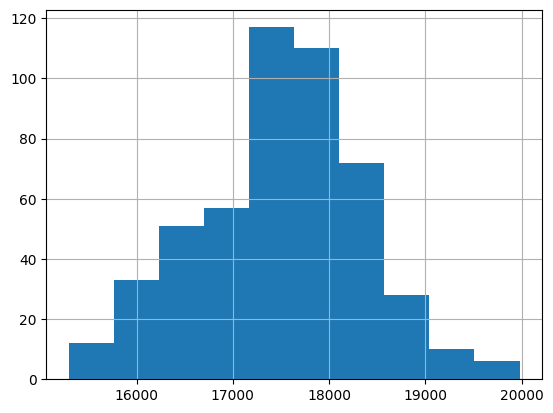

In [ ]:
nifty_data['Close'].hist()

Since the data seems to be right-skewed, we will replace NaN values with Median.


In [ ]:
nifty_data['RSI'] = nifty_data['RSI'].fillna(nifty_data['RSI'].median())
nifty_data

,Open,High,Low,Close,Adj Close,Volume,Level_Type,merged,RSI
Date,,,,,,,,,
2021-07-23,15856.799805,15899.799805,15768.400391,15856.049805,15856.049805,294100,NaN,0.0,54.916736
2021-07-26,15849.299805,15893.349609,15797.000000,15824.450195,15824.450195,267100,NaN,0.0,54.916736
2021-07-27,15860.500000,15881.549805,15701.000000,15746.450195,15746.450195,311000,NaN,0.0,54.916736
2021-07-28,15761.549805,15767.500000,15513.450195,15709.400391,15709.400391,318600,NaN,0.0,54.916736
2021-07-29,15762.700195,15817.349609,15737.799805,15778.450195,15778.450195,401600,NaN,0.0,54.916736
...,...,...,...,...,...,...,...,...,...
2023-07-17,19612.150391,19731.849609,19562.949219,19711.449219,19711.449219,268700,NaN,0.0,75.683578
2023-07-18,19787.500000,19819.449219,19690.199219,19749.250000,19749.250000,286400,NaN,0.0,76.437406
2023-07-19,19802.949219,19851.699219,19727.449219,19833.150391,19833.150391,259700,NaN,0.0,78.062951


In [ ]:
print(nifty_data['RSI'].isna().sum())

0


In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=68fc7be640cf1df1a9f173c467125bd4b8f292db5c3099e6b3d51a766ab97171
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import pandas_ta as ta

In [ ]:
#nifty_data['EMAF']=ta.ema(nifty_data['Close'], length=20)
nifty_data['EMAM']=ta.ema(nifty_data['Close'], length=100)


In [ ]:
nifty_data

,Open,High,Low,Close,Adj Close,Volume,Level_Type,merged,RSI
Date,,,,,,,,,
2021-07-23,15856.799805,15899.799805,15768.400391,15856.049805,15856.049805,294100,NaN,0.0,54.916736
2021-07-26,15849.299805,15893.349609,15797.000000,15824.450195,15824.450195,267100,NaN,0.0,54.916736
2021-07-27,15860.500000,15881.549805,15701.000000,15746.450195,15746.450195,311000,NaN,0.0,54.916736
2021-07-28,15761.549805,15767.500000,15513.450195,15709.400391,15709.400391,318600,NaN,0.0,54.916736
2021-07-29,15762.700195,15817.349609,15737.799805,15778.450195,15778.450195,401600,NaN,0.0,54.916736
...,...,...,...,...,...,...,...,...,...
2023-07-17,19612.150391,19731.849609,19562.949219,19711.449219,19711.449219,268700,NaN,0.0,75.683578
2023-07-18,19787.500000,19819.449219,19690.199219,19749.250000,19749.250000,286400,NaN,0.0,76.437406
2023-07-19,19802.949219,19851.699219,19727.449219,19833.150391,19833.150391,259700,NaN,0.0,78.062951


In [ ]:

nifty_data['EMAM'] = nifty_data['EMAM'].fillna(nifty_data['EMAM'].median())

nifty_data


,Open,High,Low,Close,Adj Close,Volume,Level_Type,merged,RSI,EMAM
Date,,,,,,,,,,
2021-07-23,15856.799805,15899.799805,15768.400391,15856.049805,15856.049805,294100,NaN,0.0,54.916736,17375.035406
2021-07-26,15849.299805,15893.349609,15797.000000,15824.450195,15824.450195,267100,NaN,0.0,54.916736,17375.035406
2021-07-27,15860.500000,15881.549805,15701.000000,15746.450195,15746.450195,311000,NaN,0.0,54.916736,17375.035406
2021-07-28,15761.549805,15767.500000,15513.450195,15709.400391,15709.400391,318600,NaN,0.0,54.916736,17375.035406
2021-07-29,15762.700195,15817.349609,15737.799805,15778.450195,15778.450195,401600,NaN,0.0,54.916736,17375.035406
...,...,...,...,...,...,...,...,...,...,...
2023-07-17,19612.150391,19731.849609,19562.949219,19711.449219,19711.449219,268700,NaN,0.0,75.683578,18430.396045
2023-07-18,19787.500000,19819.449219,19690.199219,19749.250000,19749.250000,286400,NaN,0.0,76.437406,18456.511964
2023-07-19,19802.949219,19851.699219,19727.449219,19833.150391,19833.150391,259700,NaN,0.0,78.062951,18483.772131


In [ ]:
nifty_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Level_Type',
       'merged', 'RSI', 'EMAM'],
      dtype='object')

In [ ]:
nifty_data.corr()

,Open,High,Low,Close,Adj Close,Volume,Level_Type,merged,RSI,EMAM
Open,1.000000,0.996567,0.994461,0.989422,0.989422,-0.144614,-0.010104,-0.073455,0.436395,0.690867
High,0.996567,1.000000,0.995063,0.995190,0.995190,-0.133361,-0.004305,-0.061112,0.437974,0.690028
Low,0.994461,0.995063,1.000000,0.996316,0.996316,-0.164679,-0.002165,-0.045875,0.474050,0.685079
Close,0.989422,0.995190,0.996316,1.000000,1.000000,-0.149586,0.024707,-0.030074,0.475566,0.683810
Adj Close,0.989422,0.995190,0.996316,1.000000,1.000000,-0.149586,0.024707,-0.030074,0.475566,0.683810
Volume,-0.144614,-0.133361,-0.164679,-0.149586,-0.149586,1.000000,-0.022937,-0.038356,-0.039039,-0.079761
Level_Type,-0.010104,-0.004305,-0.002165,0.024707,0.024707,-0.022937,1.000000,0.237295,-0.058422,0.085664
merged,-0.073455,-0.061112,-0.045875,-0.030074,-0.030074,-0.038356,0.237295,1.000000,-0.031911,0.000466
RSI,0.436395,0.437974,0.474050,0.475566,0.475566,-0.039039,-0.058422,-0.031911,1.000000,0.050402
EMAM,0.690867,0.690028,0.685079,0.683810,0.683810,-0.079761,0.085664,0.000466,0.050402,1.000000


In [ ]:
missing_values = nifty_data.isna().sum()
print(missing_values)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
EMAM         0
dtype: int64


In [ ]:
corr_matrix=nifty_data.corr()
corr_matrix

,Open,High,Low,Close,Adj Close,Volume,Level_Type
Open,1.000000,0.996567,0.994461,0.989422,0.989422,-0.144614,-0.010104
High,0.996567,1.000000,0.995063,0.995190,0.995190,-0.133361,-0.004305
Low,0.994461,0.995063,1.000000,0.996316,0.996316,-0.164679,-0.002165
Close,0.989422,0.995190,0.996316,1.000000,1.000000,-0.149586,0.024707
Adj Close,0.989422,0.995190,0.996316,1.000000,1.000000,-0.149586,0.024707
Volume,-0.144614,-0.133361,-0.164679,-0.149586,-0.149586,1.000000,-0.022937
Level_Type,-0.010104,-0.004305,-0.002165,0.024707,0.024707,-0.022937,1.000000


In [ ]:
high = nifty_data['High'].max()
low = nifty_data['Low'].min()

fib_levels = {
    0: low,

    0.5: low + 0.5 * (high - low),
    0.618: low + 0.618 * (high - low),
    1: high
}

# Add Fibonacci levels to DataFrame
for level, price in fib_levels.items():
    column_name = f'Fib_{level}'
    nifty_data[column_name] = price

# Print the updated DataFrame
nifty_data.head()


,Open,High,Low,Close,Adj Close,Volume,Fib_0,Fib_0.5,Fib_0.618,Fib_1
Date,,,,,,,,,,
2021-07-23,15856.799805,15899.799805,15768.400391,15856.049805,15856.049805,294100,15183.400391,17587.625,18155.022008,19991.849609
2021-07-26,15849.299805,15893.349609,15797.000000,15824.450195,15824.450195,267100,15183.400391,17587.625,18155.022008,19991.849609
2021-07-27,15860.500000,15881.549805,15701.000000,15746.450195,15746.450195,311000,15183.400391,17587.625,18155.022008,19991.849609
2021-07-28,15761.549805,15767.500000,15513.450195,15709.400391,15709.400391,318600,15183.400391,17587.625,18155.022008,19991.849609
2021-07-29,15762.700195,15817.349609,15737.799805,15778.450195,15778.450195,401600,15183.400391,17587.625,18155.022008,19991.849609


In [ ]:
nifty_data.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Adj Close     float64
Volume          int64
Level_Type    float64
merged        float64
RSI           float64
EMAM          float64
Fib_0         float64
Fib_0.5       float64
Fib_0.618     float64
Fib_1         float64
dtype: object

In [ ]:
nifty_data['TargetNextClose'] = nifty_data['Adj Close'].shift(-1)

In [ ]:
nifty_data.fillna(0, inplace=True)
nifty_data

,Open,High,Low,Close,Adj Close,Volume,Level_Type,merged,RSI,EMAM,TargetNextClose
Date,,,,,,,,,,,
2021-07-23,15856.799805,15899.799805,15768.400391,15856.049805,15856.049805,294100,0.0,0.0,54.916736,17375.035406,15824.450195
2021-07-26,15849.299805,15893.349609,15797.000000,15824.450195,15824.450195,267100,0.0,0.0,54.916736,17375.035406,15746.450195
2021-07-27,15860.500000,15881.549805,15701.000000,15746.450195,15746.450195,311000,0.0,0.0,54.916736,17375.035406,15709.400391
2021-07-28,15761.549805,15767.500000,15513.450195,15709.400391,15709.400391,318600,0.0,0.0,54.916736,17375.035406,15778.450195
2021-07-29,15762.700195,15817.349609,15737.799805,15778.450195,15778.450195,401600,0.0,0.0,54.916736,17375.035406,15763.049805
...,...,...,...,...,...,...,...,...,...,...,...
2023-07-17,19612.150391,19731.849609,19562.949219,19711.449219,19711.449219,268700,0.0,0.0,75.683578,18430.396045,19749.250000
2023-07-18,19787.500000,19819.449219,19690.199219,19749.250000,19749.250000,286400,0.0,0.0,76.437406,18456.511964,19833.150391
2023-07-19,19802.949219,19851.699219,19727.449219,19833.150391,19833.150391,259700,0.0,0.0,78.062951,18483.772131,19979.150391


In [ ]:
nifty_data.corr()

,Open,High,Low,Close,Adj Close,Volume,Level_Type,merged,RSI,EMAM,Fib_0,Fib_0.5,Fib_0.618,Fib_1,TargetNextClose
Open,1.000000,0.996567,0.994461,0.989422,0.989422,-0.144614,-0.005113,-0.073455,0.436395,0.690867,NaN,NaN,NaN,NaN,0.629628
High,0.996567,1.000000,0.995063,0.995190,0.995190,-0.133361,-0.001759,-0.061112,0.437974,0.690028,NaN,NaN,NaN,NaN,0.632137
Low,0.994461,0.995063,1.000000,0.996316,0.996316,-0.164679,0.000224,-0.045875,0.474050,0.685079,NaN,NaN,NaN,NaN,0.635939
Close,0.989422,0.995190,0.996316,1.000000,1.000000,-0.149586,0.015378,-0.030074,0.475566,0.683810,NaN,NaN,NaN,NaN,0.639767
Adj Close,0.989422,0.995190,0.996316,1.000000,1.000000,-0.149586,0.015378,-0.030074,0.475566,0.683810,NaN,NaN,NaN,NaN,0.639767
Volume,-0.144614,-0.133361,-0.164679,-0.149586,-0.149586,1.000000,-0.012118,-0.038356,-0.039039,-0.079761,NaN,NaN,NaN,NaN,-0.119368
Level_Type,-0.005113,-0.001759,0.000224,0.015378,0.015378,-0.012118,1.000000,0.182858,-0.030570,0.048779,NaN,NaN,NaN,NaN,0.061577
merged,-0.073455,-0.061112,-0.045875,-0.030074,-0.030074,-0.038356,0.182858,1.000000,-0.031911,0.000466,NaN,NaN,NaN,NaN,-0.010423
RSI,0.436395,0.437974,0.474050,0.475566,0.475566,-0.039039,-0.030570,-0.031911,1.000000,0.050402,NaN,NaN,NaN,NaN,0.325006
EMAM,0.690867,0.690028,0.685079,0.683810,0.683810,-0.079761,0.048779,0.000466,0.050402,1.000000,NaN,NaN,NaN,NaN,0.407818


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
nifty_data[nifty_data.columns] = sc.fit_transform(nifty_data)

nifty_data
nifty_data.shape

(496, 11)

In [ ]:
# Load nifty data into dataframe df

# Split data
num_train = int(len(nifty_data) * 0.7)
train_df = nifty_data[:num_train]
test_df = nifty_data[num_train:]

# Create sequences
def create_sequences(data):

  sequences = []
  labels = []

  for i in range(50, len(data)-1):

    # Extract sequence
    seq = data.iloc[i-50:i, :-1]
    sequences.append(seq)

    # Extract label
    label = data.iloc[i, -1]
    labels.append(label)

  return np.array(sequences), np.array(labels)

X_train, y_train = create_sequences(train_df)
X_test, y_test = create_sequences(test_df)

In [ ]:
print(X_train)

[[[0.12812967 0.11222837 0.12786885 ... 0.         0.         0.        ]
  [0.12648459 0.110829   0.13412013 ... 0.         0.         0.        ]
  [0.12894128 0.10826903 0.11313653 ... 0.         0.         0.        ]
  ...
  [0.53657026 0.51192697 0.52501622 ... 0.         0.         0.        ]
  [0.49555293 0.47179116 0.49606557 ... 0.         0.         0.        ]
  [0.51390114 0.51382529 0.52414191 ... 0.         0.         0.        ]]

 [[0.12648459 0.110829   0.13412013 ... 0.         0.         0.        ]
  [0.12894128 0.10826903 0.11313653 ... 0.         0.         0.        ]
  [0.10723715 0.08352588 0.07214203 ... 0.         0.         0.        ]
  ...
  [0.49555293 0.47179116 0.49606557 ... 0.         0.         0.        ]
  [0.51390114 0.51382529 0.52414191 ... 0.         0.         0.        ]
  [0.52394684 0.53173428 0.53715847 ... 0.         0.         0.        ]]

 [[0.12894128 0.10826903 0.11313653 ... 0.         0.         0.        ]
  [0.10723715 0.083525

In [ ]:
# # multiple feature from data provided to the model
# X = []

# backcandles = 30
# print(data_set_scaled.shape[0])
# for j in range(14):#data_set_scaled[0].size):#2 columns are target not X
#     X.append([])
#     for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
#         X[j].append(data_set_scaled[i-backcandles:i, j])

# #move axis from 0 to position 2
# X=np.moveaxis(X, [0], [2])


# X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
# y=np.reshape(yi,(len(yi),1))
# #y=sc.fit_transform(yi)
# #X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# #print(X)
# print(X.shape)
# #print(y)
# print(y.shape)

In [ ]:
# # split data into train test sets
# splitlimit = int(len(X)*0.8)
# #print(splitlimit)
# X_train, X_test = X[:splitlimit], X[splitlimit:]
# y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#print(y_train)

(296, 50, 10)
(98, 50, 10)
(296,)
(98,)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)


In [ ]:
lstm_input = Input(shape=(50, 10), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)a
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 50, 10)]          0         
                                                                 
 first_layer (LSTM)          (None, 150)               96600     
                                                                 
 dense_layer (Dense)         (None, 1)                 151       
                                                                 
 output (Activation)         (None, 1)                 0         
                                                                 
Total params: 96,751
Trainable params: 96,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test), verbose=1)
test_predicted = model.predict(X_test)
#test_inverse_predicted = MMS.inverse_transform(test_predicted)

Epoch 1/100
10/10 [==============================] - 3s 57ms/step - loss: 0.1604 - mean_absolute_error: 0.3171 - val_loss: 0.0134 - val_mean_absolute_error: 0.0996
Epoch 2/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0300 - mean_absolute_error: 0.1401 - val_loss: 0.0281 - val_mean_absolute_error: 0.1398
Epoch 3/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0132 - mean_absolute_error: 0.0935 - val_loss: 0.0098 - val_mean_absolute_error: 0.0817
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0062 - mean_absolute_error: 0.0621 - val_loss: 0.0053 - val_mean_absolute_error: 0.0622
Epoch 5/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0022 - mean_absolute_error: 0.0377 - val_loss: 0.0013 - val_mean_absolute_error: 0.0311
Epoch 6/100
10/10 [==============================] - 0s 16ms/step - loss: 0.0012 - mean_absolute_error: 0.0276 - val_loss: 0.0018 - val_mean_absolute_error: 0.0358
Epoch 7/100
10/1

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

4/4 [==============================] - 0s 4ms/step
[[0.8701963 ]
 [0.86716783]
 [0.8625946 ]
 [0.8658655 ]
 [0.8594125 ]
 [0.8700047 ]
 [0.872455  ]
 [0.87281007]
 [0.8807303 ]
 [0.8718227 ]
 [0.86798286]
 [0.8513202 ]
 [0.8451708 ]
 [0.83986455]
 [0.84363157]
 [0.835656  ]
 [0.8481458 ]
 [0.8489804 ]
 [0.84805423]
 [0.8471153 ]
 [0.84962106]
 [0.84599376]
 [0.85399354]
 [0.85319716]
 [0.8642383 ]
 [0.8705583 ]
 [0.8764936 ]
 [0.88048553]
 [0.88311726]
 [0.8858316 ]
 [0.8898367 ]
 [0.8908884 ]
 [0.88017106]
 [0.88205886]
 [0.88606614]
 [0.8747287 ]
 [0.88425213]
 [0.88215584]
 [0.8842391 ]
 [0.8942576 ]
 [0.8945238 ]
 [0.89991766]
 [0.89774626]
 [0.90861785]
 [0.90052444]
 [0.90865344]
 [0.90764576]
 [0.9024435 ]
 [0.91397685]
 [0.903025  ]
 [0.9135013 ]
 [0.9051007 ]
 [0.90708673]
 [0.9023937 ]
 [0.8993123 ]
 [0.9062674 ]
 [0.9062891 ]
 [0.90298665]
 [0.90616816]
 [0.912834  ]
 [0.9145    ]
 [0.920191  ]
 [0.9161158 ]
 [0.9134393 ]
 [0.9254152 ]
 [0.9245034 ]
 [0.9204498 ]
 [0.9310745

In [ ]:
y_pred = model.predict(X_test)


#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i],"==" ,y_test[i])


4/4 [==============================] - 0s 4ms/step
[0.8566112] == 0.8705424844747821
[0.85172105] == 0.8661003536401474
[0.8456017] == 0.8734555799136307
[0.84874356] == 0.8669988488976546
[0.8423445] == 0.8806355258044886
[0.8498407] == 0.8864966163456534
[0.8550246] == 0.888646416063621
[0.85278684] == 0.8803977779570011
[0.8584089] == 0.8715535971337307
[0.8400408] == 0.8586101233463597


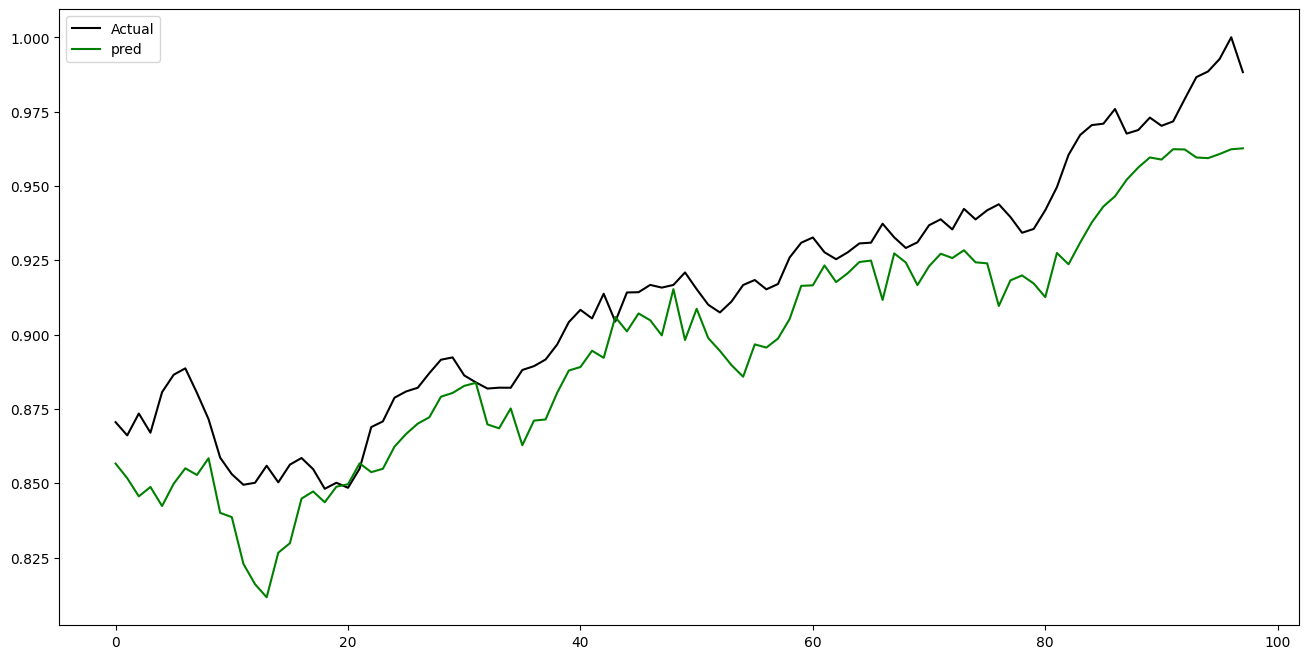

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Actual')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

94

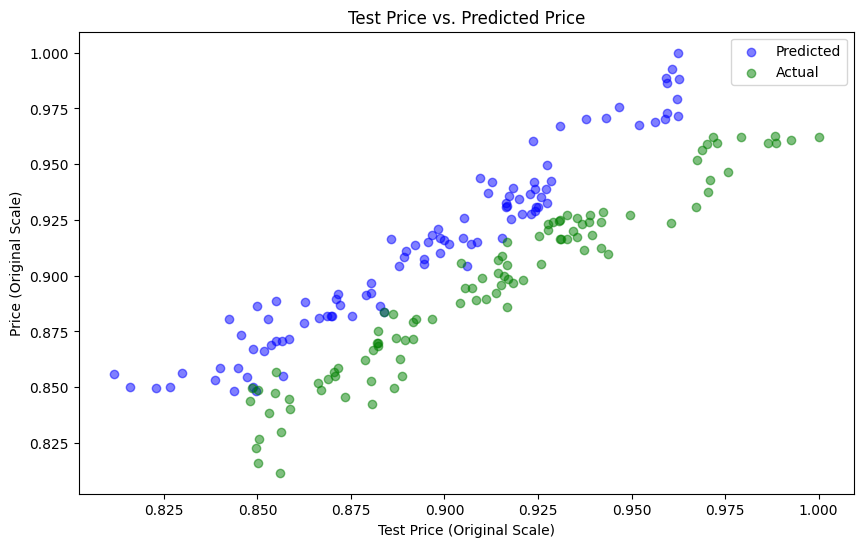

In [ ]:
import matplotlib.pyplot as plt

# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(y_pred,y_test, color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_test,y_pred, color='green', alpha=0.5, label='Actual')
plt.title("Test Price vs. Predicted Price")
plt.xlabel("Test Price (Original Scale)")
plt.ylabel("Price (Original Scale)")
plt.legend()
plt.show()
